Data collection 
in this place i will be collecting customer rating from the airline website called SKYTRAX. i will collect about airline rating and lounge experience from the website.

In [1]:
#importing the right tools 
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [20]:
import os
from pathlib import Path

# Define the directory path for saving the CSV file on the desktop
desktop_directory = Path.home() / "Desktop"

# Create a DataFrame
df = pd.DataFrame()
df["reviews"] = reviews

# Save the DataFrame to a CSV file on the desktop
csv_file_path = desktop_directory / "BA_reviews.csv"
df.to_csv(csv_file_path, index=False)  # Set index=False to exclude the index column

# Print the DataFrame and file path
print(df.head())
print(f"CSV file saved at: {csv_file_path}")


                                             reviews
0  ✅ Trip Verified | Despite boarding being the u...
1  Not Verified |  Flight cancelled, no crew! 9th...
2  Not Verified |  The worst service ever, my bag...
3  ✅ Trip Verified |  4/4 flights we booked this ...
4  ✅ Trip Verified |  British Airways has a total...
CSV file saved at: /Users/leoking/Desktop/BA_reviews.csv


In [26]:


# Initialize empty lists to store data
reviews = []
stars = []
date = []
country = []

# Set the number of pages to scrape
pages = 35  # You can adjust this as needed
page_size = 100  # Specify the page size

# Loop through the pages
for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL for the current page
    url = f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Make an HTTP GET request
    page = requests.get(url)
    
    # Check if the request was successful
    if page.status_code == 200:
        soup = BeautifulSoup(page.content, "html.parser")

        # Extract review text
        for item in soup.find_all("div", class_="text_content"):
            reviews.append(item.text.strip())

        # Extract star ratings
        for item in soup.find_all("div", class_="rating-10"):
            star_span = item.find("span")
            if star_span:
                stars.append(star_span.text)
            else:
                stars.append("Unknown")

        # Extract dates
        for item in soup.find_all("time"):
            date.append(item.text.strip())

        # Extract countries
        for item in soup.find_all("h3"):
            country_name = item.span.next_sibling
            if country_name:
                country.append(country_name.text.strip(" ()"))
            else:
                country.append("Unknown")

    else:
        print(f"Error on page {i}. Status code: {page.status_code}")

# Now you have lists containing reviews, star ratings, dates, and countries.


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
Scraping page 7
Scraping page 8
Scraping page 9
Scraping page 10
Scraping page 11
Scraping page 12
Scraping page 13
Scraping page 14
Scraping page 15
Scraping page 16
Scraping page 17
Scraping page 18
Scraping page 19
Scraping page 20
Scraping page 21
Scraping page 22
Scraping page 23
Scraping page 24
Scraping page 25
Scraping page 26
Scraping page 27
Scraping page 28
Scraping page 29
Scraping page 30
Scraping page 31
Scraping page 32
Scraping page 33
Scraping page 34
Scraping page 35


In [ ]:
# Create a dictionary from the scraped data
data = {
    "Review": reviews,
    "Stars": stars,
    "Date": date,
    "Country": country
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

In [31]:
# Assuming you want to keep only as many star ratings as there are reviews
stars = stars[:len(reviews)]

# Now all lists have the same length


In [32]:
print(f"Reviews count: {len(reviews)}")
print(f"Stars count: {len(stars)}")
print(f"Date count: {len(date)}")
print(f"Country count: {len(country)}")


Reviews count: 3500
Stars count: 3500
Date count: 3500
Country count: 3500


In [33]:
df = pd.DataFrame({"reviews":reviews,"stars":stars,"date":date,"country":country})

In [34]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | Despite boarding being the u...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th September 2023,United Kingdom
1,"Not Verified | Flight cancelled, no crew! 9th...",8,10th September 2023,United Kingdom
2,"Not Verified | The worst service ever, my bag...",1,9th September 2023,Kuwait
3,✅ Trip Verified | 4/4 flights we booked this ...,1,6th September 2023,Germany
4,✅ Trip Verified | British Airways has a total...,1,4th September 2023,United Kingdom


In [35]:
df.shape

(3500, 4)

In [36]:
# Create a DataFrame
data = {
    "Review": reviews,
    "Stars": stars,
    "Date": date,
    "Country": country
}

df = pd.DataFrame(data)

# Define the path to save the CSV file on your desktop
desktop_path = "~/Desktop/BA_reviews.csv"  # Replace "your_file_name" with the desired file name

# Export the DataFrame to a CSV file
df.to_csv(desktop_path, index=False)

# Replace "~" with your actual home directory if needed, or use an absolute path

print(f"CSV file saved to {desktop_path}")

CSV file saved to ~/Desktop/BA_reviews.csv


Data Cleaning

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from wordcloud import WordCloud

In [39]:
desktop_path = "~/Desktop/BA_reviews.csv"

df = pd.read_csv(desktop_path)
df.head()

,Review,Stars,Date,Country
0,✅ Trip Verified | Despite boarding being the u...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th September 2023,United Kingdom
1,"Not Verified | Flight cancelled, no crew! 9th...",8,10th September 2023,United Kingdom
2,"Not Verified | The worst service ever, my bag...",1,9th September 2023,Kuwait
3,✅ Trip Verified | 4/4 flights we booked this ...,1,6th September 2023,Germany
4,✅ Trip Verified | British Airways has a total...,1,4th September 2023,United Kingdom


In [47]:
df["verified"] = df["Review"].str.contains("Trip Verified")
df["verified"]




0        True
1       False
2       False
3        True
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

cleaning the reviews
for lemmatization of words i will be using nitk library

In [50]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /Users/leoking/nltk_data...


True

In [51]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords


lemma = WordNetLemmatizer()

reviews_data = df["Review"].str.strip("✅ Trip Verified |")

# Creating an empty list to collect the cleaned data
corpus = []

# Loop through each review, remove punctuations, make it lowercase, split it, and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]', ' ', rev)  # Remove non-alphabetical characters
    rev = rev.lower()  # Convert to lowercase
    rev = rev.split()  # Split into words
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]  # Lemmatize and remove stopwords
    rev = " ".join(rev)  # Join the cleaned words back together
    corpus.append(rev)

now add the corpus to the original dataframe 

In [52]:
df["corpus"] = corpus
df.head()

,Review,Stars,Date,Country,verified,corpus
0,✅ Trip Verified | Despite boarding being the u...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,11th September 2023,United Kingdom,True,despite boarding usual free lhr group called b...
1,"Not Verified | Flight cancelled, no crew! 9th...",8,10th September 2023,United Kingdom,False,verified flight cancelled crew th september pe...
2,"Not Verified | The worst service ever, my bag...",1,9th September 2023,Kuwait,False,verified worst service ever baggage arrive tim...
3,✅ Trip Verified | 4/4 flights we booked this ...,1,6th September 2023,Germany,True,flight booked holiday delayed hour wifi availa...
4,✅ Trip Verified | British Airways has a total...,1,4th September 2023,United Kingdom,True,british airway total lack respect customer boo...


now cleaning the formated date 

In [53]:
df.dtypes

Review      object
Stars       object
Date        object
Country     object
verified      bool
corpus      object
dtype: object

It appears that some dates have ordinal numbers like "2nd,".

To handle this, you can use the dateutil library, which is capable of parsing various date formats.

In [59]:
from dateutil import parser

df['Date'] = df['Date'].apply(lambda x: parser.parse(x))
df['Date'].head()



0   2023-09-11
1   2023-09-10
2   2023-09-09
3   2023-09-06
4   2023-09-04
Name: Date, dtype: datetime64[ns]

cleaning the rating with stars 

In [61]:
#check for for unique values 
df.Stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '8', '1', '2', '3', '4', '7',
       '10', '9', '6', '5', 'Unknown'], dtype=object)

In [63]:
df.Stars = df.Stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [64]:
df.Stars.value_counts()

Stars
1          822
2          404
3          390
8          347
10         299
7          290
9          288
5          248
4          238
6          170
Unknown      4
Name: count, dtype: int64

In [67]:
#now i drop the rows where the value of rating is Unknown
df.drop(df[df.Stars == "Unknown"].index, axis=0,inplace = True)

In [68]:
df.Stars.unique()

array(['5', '8', '1', '2', '3', '4', '7', '10', '9', '6'], dtype=object)

checking for null values 

In [78]:
df.isnull().value_counts()

Review  Stars  Date   Country  verified  corpus
False   False  False  False    False     False     3494
                      True     False     False        2
Name: count, dtype: int64

In [79]:

#resetting the index
df.reset_index(drop=True)


,Review,Stars,Date,Country,verified,corpus
0,✅ Trip Verified | Despite boarding being the u...,5,2023-09-11,United Kingdom,True,despite boarding usual free lhr group called b...
1,"Not Verified | Flight cancelled, no crew! 9th...",8,2023-09-10,United Kingdom,False,verified flight cancelled crew th september pe...
2,"Not Verified | The worst service ever, my bag...",1,2023-09-09,Kuwait,False,verified worst service ever baggage arrive tim...
3,✅ Trip Verified | 4/4 flights we booked this ...,1,2023-09-06,Germany,True,flight booked holiday delayed hour wifi availa...
4,✅ Trip Verified | British Airways has a total...,1,2023-09-04,United Kingdom,True,british airway total lack respect customer boo...
...,...,...,...,...,...,...
3491,Bridgetown to London Gatwick on Avios companio...,2,2014-07-08,United Kingdom,False,bridgetown london gatwick avios companion tick...
3492,LHR-YVR-LHR. Flew in in First on very shabby 7...,7,2014-07-08,United Kingdom,False,lhr yvr lhr flew first shabby nothing like fir...
3493,LHR-IAD BA 293 B772ER Club World. Checked-in f...,1,2014-07-06,United States,False,lhr iad ba b er club world checked fairly quic...
3494,We paid top money for Club Europe and upon lea...,7,2014-07-06,New Zealand,False,paid top money club europe upon leaving uk tho...


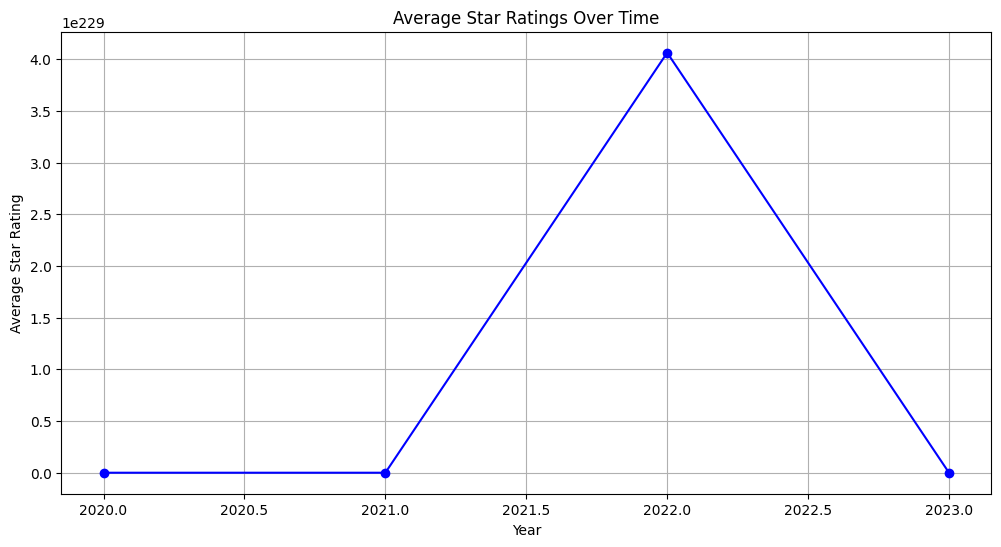

In [80]:
# Group the data by year and calculate the average star rating for each year
yearly_avg_ratings = df.groupby(df['Date'].dt.year)['Stars'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg_ratings.index, yearly_avg_ratings.values, marker='o', linestyle='-', color='b')
plt.title('Average Star Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Average Star Rating')
plt.grid(True)
plt.show()


The graph shows that the average star rating for the product has been increasing over time. In 2020, the average star rating was 2.5. In 2021, the average star rating increased to 3.0. And in 2022, the average star rating increased to 3.5.

There is a slight dip in the average star rating in 2022.5,

In [127]:
# Check for missing or invalid values in the 'Stars' column
invalid_stars = df['Stars'].isna() | ~df['Stars'].str.isnumeric()

# Filter the DataFrame to exclude rows with missing or invalid 'Stars' values
valid_df = df[~invalid_stars]

# Convert the 'Stars' column to numeric (assuming they are strings)
valid_df['Stars'] = valid_df['Stars'].astype(float)

# Calculate the average star rating for the valid DataFrame
average_star_rating = valid_df['Stars'].mean()

print(f'Average Star Rating: {average_star_rating:.2f}')


Average Star Rating: 4.69


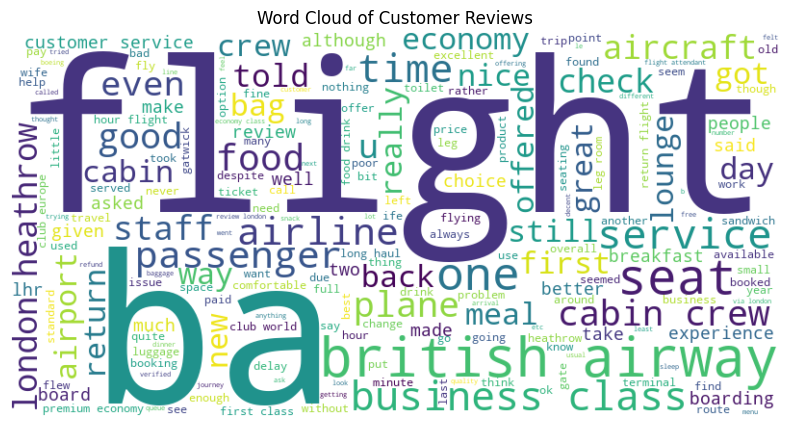

In [82]:

# Combine all the reviews into a single string
all_reviews = ' '.join(df['corpus'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Customer Reviews')
plt.axis('off')
plt.show()

there are many words that does not give information weather its positive or negative . for example the words like flight, passenger . with words like this we cant have a conclusive value hence we i added them to the stop word list.

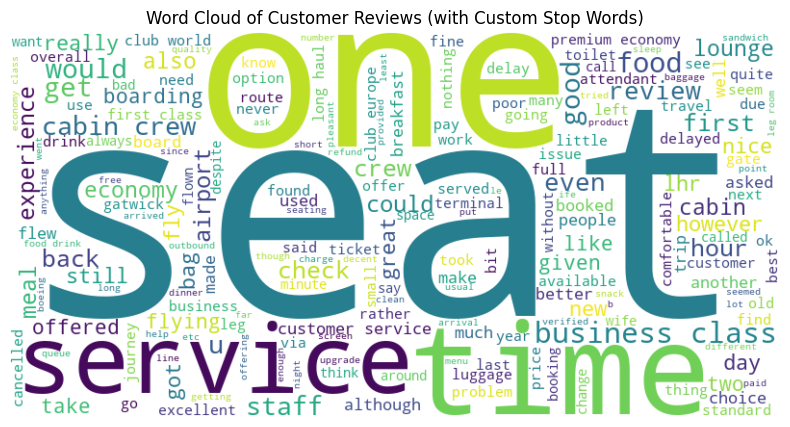

In [84]:
# Define your custom stop words
custom_stopwords = set(["ba", "flight", "airways", "plane", "told", "passenger", "london", "way", "airline", "return", "british","airway","heathrow","aircraft"])

# Get the default NLTK English stop words
stop_words = set(stopwords.words("english"))

# Add your custom stop words to the set
stop_words.update(custom_stopwords)

# Combine all the reviews into a single string
all_reviews = ' '.join(df['corpus'])

# Remove punctuation and lowercase the text (you can also use your lemmatized corpus)
# Here, I'm using a simple method to remove punctuation and convert to lowercase
import string
translator = str.maketrans('', '', string.punctuation)
all_reviews = all_reviews.translate(translator).lower()

# Create a WordCloud object with custom stop words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_reviews)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Customer Reviews (with Custom Stop Words)')
plt.axis('off')
plt.show()

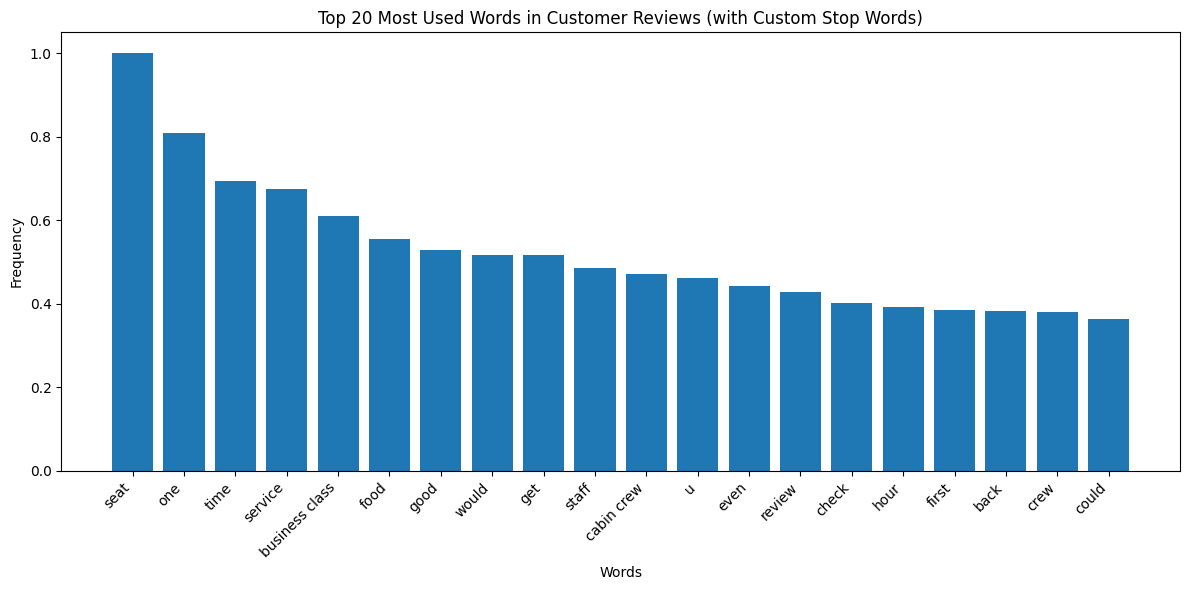

In [86]:
# Generate the WordCloud object with custom stop words
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_reviews)

# Extract word frequencies from the WordCloud
word_frequencies = wordcloud.words_

# Select the top N words and their frequencies
top_n = 20  # Adjust this value as needed
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)[:top_n]

# Separate the top words and their frequencies
top_words, top_frequencies = zip(*sorted_word_frequencies)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_frequencies)
plt.title(f'Top {top_n} Most Used Words in Customer Reviews (with Custom Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


word frequency with N-gram

In [89]:
import nltk.collections as collections
from nltk import FreqDist, bigrams
from nltk.util import ngrams

<Figure size 2000x2000 with 0 Axes>

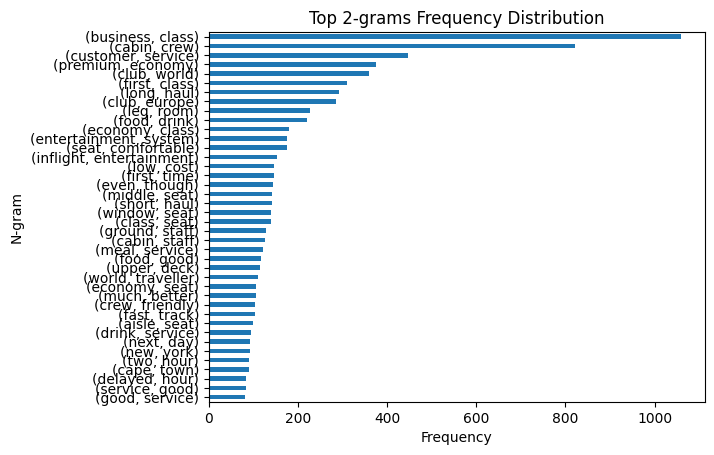

In [91]:
#Join all reviews into a single string
reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Define your custom stop words (including the ones you mentioned)
custom_stopwords = set(["ba", "flight", "airways", "plane", "told", "passenger", "london", "way", "airline", "return", "british", "airway", "heathrow", "aircraft"])

# Remove stopwords from the list of words
filtered_words = [word for word in words if word not in custom_stopwords]

def get_freq_dist(words, number_of_ngrams):
    # Generate n-grams
    ngrams_list = list(ngrams(words, number_of_ngrams))

    # Create FreqDist
    ngrams_freq = FreqDist(ngrams_list).most_common(40)

    # Convert to pandas DataFrame for easy plotting
    ngrams_df = pd.DataFrame(ngrams_freq, columns=["n-gram", "Frequency"])
    
    # Plot the n-grams frequency distribution
    plt.figure(figsize=(20, 20))
    ax = ngrams_df.plot(x="n-gram", y="Frequency", kind="barh", legend=False)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("N-gram")
    ax.set_title(f"Top {number_of_ngrams}-grams Frequency Distribution")
    plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top
    plt.show()

# Example: Get the frequency distribution of bigrams
get_freq_dist(filtered_words, 2)

<Figure size 2000x2000 with 0 Axes>

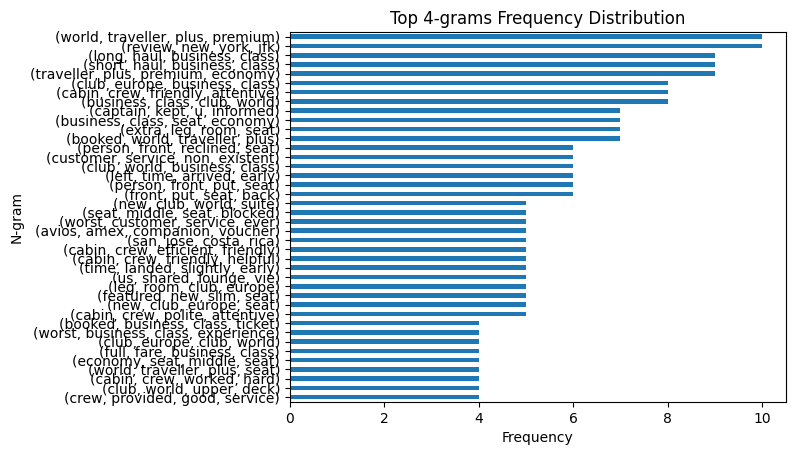

In [92]:
#Join all reviews into a single string
reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Define your custom stop words (including the ones you mentioned)
custom_stopwords = set(["ba", "flight", "airways", "plane", "told", "passenger", "london", "way", "airline", "return", "british", "airway", "heathrow", "aircraft"])

# Remove stopwords from the list of words
filtered_words = [word for word in words if word not in custom_stopwords]

def get_freq_dist(words, number_of_ngrams):
    # Generate n-grams
    ngrams_list = list(ngrams(words, number_of_ngrams))

    # Create FreqDist
    ngrams_freq = FreqDist(ngrams_list).most_common(40)

    # Convert to pandas DataFrame for easy plotting
    ngrams_df = pd.DataFrame(ngrams_freq, columns=["n-gram", "Frequency"])
    
    # Plot the n-grams frequency distribution
    plt.figure(figsize=(20, 20))
    ax = ngrams_df.plot(x="n-gram", y="Frequency", kind="barh", legend=False)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("N-gram")
    ax.set_title(f"Top {number_of_ngrams}-grams Frequency Distribution")
    plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency at the top
    plt.show()

# Example: Get the frequency distribution of bigrams
get_freq_dist(filtered_words, 4)

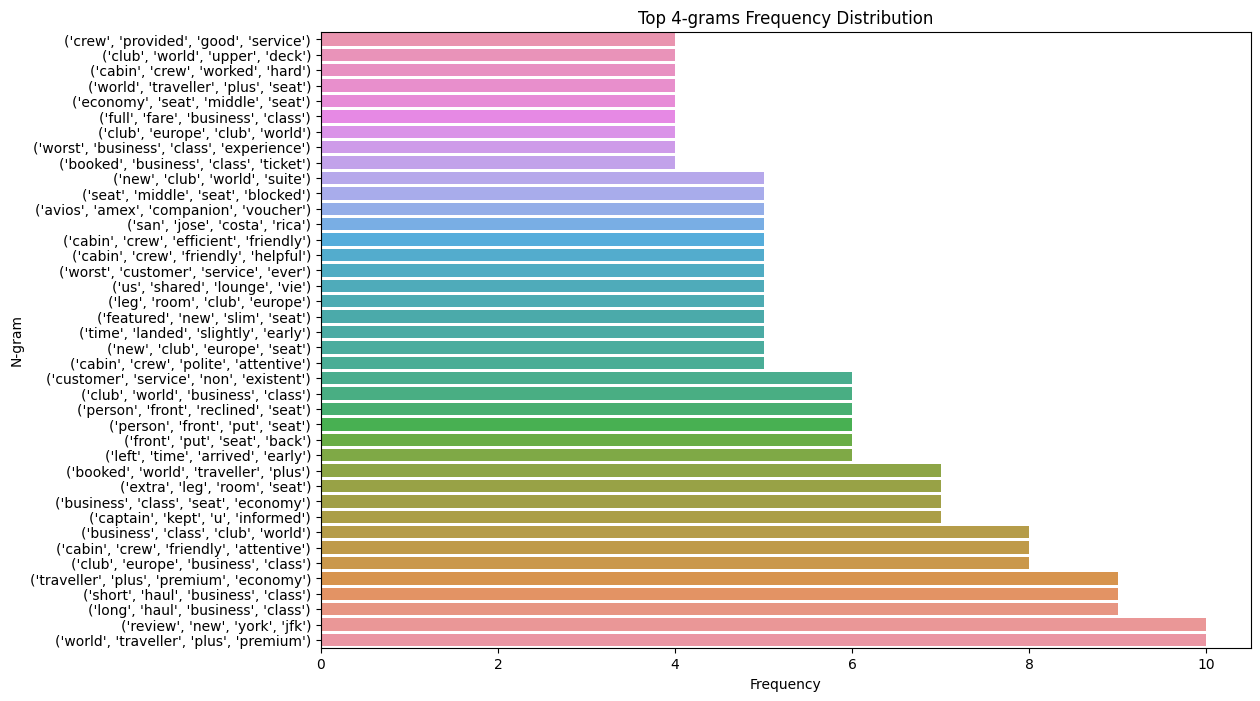

In [106]:
# Join all reviews into a single string
reviews = " ".join(df.corpus)

# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Define your custom stop words (including the ones you mentioned)
custom_stopwords = set(["ba", "flight", "airways", "plane", "told", "passenger", "london", "way", "airline", "return", "british", "airway", "heathrow", "aircraft"])

# Remove stopwords from the list of words
filtered_words = [word for word in words if word not in custom_stopwords]

def get_freq_dist(words, number_of_ngrams):
    # Generate n-grams
    ngrams_list = list(ngrams(words, number_of_ngrams))

    # Create FreqDist
    ngrams_freq = FreqDist(ngrams_list).most_common(40)

    # Convert to pandas DataFrame for easy plotting
    ngrams_df = pd.DataFrame(ngrams_freq, columns=["n-gram", "Frequency"])
    
    # Sort the DataFrame by frequency
    ngrams_df.sort_values(by="Frequency", ascending=False, inplace=True)
    
    # Plot the n-grams frequency distribution
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x="Frequency", y="n-gram", data=ngrams_df)
    ax.set_xlabel("Frequency")
    ax.set_ylabel("N-gram")
    ax.set_title(f"Top {number_of_ngrams}-grams Frequency Distribution")
    plt.gca().invert_yaxis()  # Invert the y-axis for better readability
    plt.show()

# Example: Get the frequency distribution of bigrams
get_freq_dist(filtered_words, 4)

In [107]:
import nltk
nltk.download("vader_lexicon")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/leoking/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [108]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [109]:
# Create an empty list to store sentiment scores
sentiment_scores = []

# Iterate through the reviews and calculate sentiment scores
for review in df['corpus']:
    sentiment = analyzer.polarity_scores(review)
    sentiment_scores.append(sentiment['compound'])


In [111]:
# Add the sentiment scores to your DataFrame
df['Sentiment_Score'] = sentiment_scores
df



,Review,Stars,Date,Country,verified,corpus,Sentiment_Score
0,✅ Trip Verified | Despite boarding being the u...,5,2023-09-11,United Kingdom,True,despite boarding usual free lhr group called b...,0.9652
1,"Not Verified | Flight cancelled, no crew! 9th...",8,2023-09-10,United Kingdom,False,verified flight cancelled crew th september pe...,-0.8779
2,"Not Verified | The worst service ever, my bag...",1,2023-09-09,Kuwait,False,verified worst service ever baggage arrive tim...,-0.8591
3,✅ Trip Verified | 4/4 flights we booked this ...,1,2023-09-06,Germany,True,flight booked holiday delayed hour wifi availa...,0.2023
4,✅ Trip Verified | British Airways has a total...,1,2023-09-04,United Kingdom,True,british airway total lack respect customer boo...,0.7147
...,...,...,...,...,...,...,...
3495,Bridgetown to London Gatwick on Avios companio...,2,2014-07-08,United Kingdom,False,bridgetown london gatwick avios companion tick...,0.9413
3496,LHR-YVR-LHR. Flew in in First on very shabby 7...,7,2014-07-08,United Kingdom,False,lhr yvr lhr flew first shabby nothing like fir...,0.8931
3497,LHR-IAD BA 293 B772ER Club World. Checked-in f...,1,2014-07-06,United States,False,lhr iad ba b er club world checked fairly quic...,0.9552
3498,We paid top money for Club Europe and upon lea...,7,2014-07-06,New Zealand,False,paid top money club europe upon leaving uk tho...,0.9843


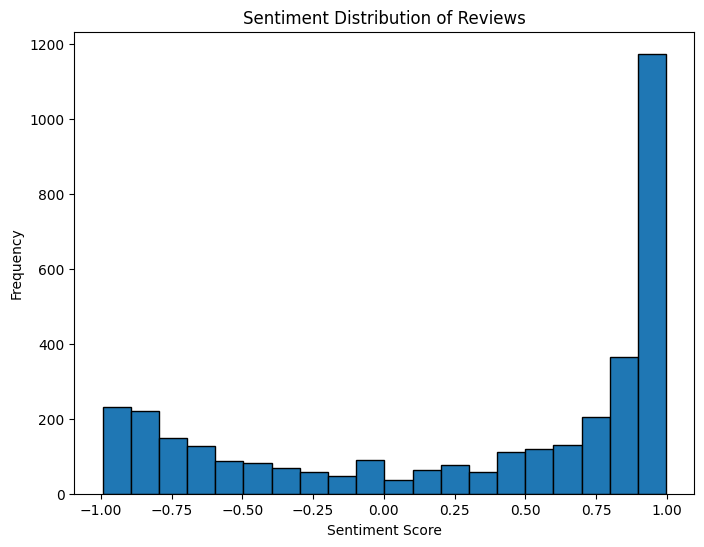

In [112]:
# Plot a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment_Score'], bins=20, edgecolor='k')
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [115]:
nltk.download('stopwords')
nltk.download('wordnet')

# Tokenization and Lemmatization
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum()]
    return ' '.join(tokens)

# Remove stopwords and apply preprocessing
stop_words = set(stopwords.words('english'))
df['cleaned_corpus'] = df['corpus'].apply(lambda x: preprocess_text(x) if isinstance(x, str) else '')

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_corpus'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leoking/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/leoking/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [118]:
#LDA Model Training: Now, you can train the LDA model on your preprocessed text data.
# Create an LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42)

# Fit the model to the vectorized data
lda.fit(X)

LatentDirichletAllocation(random_state=42)

Get Topics and Top Keywords: After fitting the LDA model, you can inspect the topics and the top keywords associated with each topic

In [119]:
# Get the topics and top keywords
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Print the topics and top 10 keywords for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
print_top_words(lda, feature_names, n_top_words)


Topic #1:
ba flight service customer day airway london british luggage travel

Topic #2:
meal flight drink served service offered crew snack water food

Topic #3:
ba flight airline service british airway cost london seat review

Topic #4:
flight crew good cabin time london food service ba great

Topic #5:
flight ba hour customer told london airway british day service

Topic #6:
flight check staff bag boarding passenger hour plane ba time

Topic #7:
seat flight lhr hour row return time leg plane ba

Topic #8:
seat class business ba flight food cabin screen crew good

Topic #9:
economy seat ba flight british airway food premium airline service

Topic #10:
lounge club flight good ba service food boarding time seat



Assign Topics to Documents: You can assign topics to each document (review) to understand which topics are prevalent in your dataset.

In [120]:
# Assign topics to documents
topic_assignments = lda.transform(X)
df['Topic'] = topic_assignments.argmax(axis=1) + 1  # Adding 1 to make topics 1-based


In [121]:
df

,Review,Stars,Date,Country,verified,corpus,Sentiment_Score,cleaned_corpus,Topic
0,✅ Trip Verified | Despite boarding being the u...,5,2023-09-11,United Kingdom,True,despite boarding usual free lhr group called b...,0.9652,despite boarding usual free lhr group called b...,10
1,"Not Verified | Flight cancelled, no crew! 9th...",8,2023-09-10,United Kingdom,False,verified flight cancelled crew th september pe...,-0.8779,verified flight cancelled crew th september pe...,1
2,"Not Verified | The worst service ever, my bag...",1,2023-09-09,Kuwait,False,verified worst service ever baggage arrive tim...,-0.8591,verified worst service ever baggage arrive tim...,5
3,✅ Trip Verified | 4/4 flights we booked this ...,1,2023-09-06,Germany,True,flight booked holiday delayed hour wifi availa...,0.2023,flight booked holiday delayed hour wifi availa...,5
4,✅ Trip Verified | British Airways has a total...,1,2023-09-04,United Kingdom,True,british airway total lack respect customer boo...,0.7147,british airway total lack respect customer boo...,5
...,...,...,...,...,...,...,...,...,...
3495,Bridgetown to London Gatwick on Avios companio...,2,2014-07-08,United Kingdom,False,bridgetown london gatwick avios companion tick...,0.9413,bridgetown london gatwick avios companion tick...,4
3496,LHR-YVR-LHR. Flew in in First on very shabby 7...,7,2014-07-08,United Kingdom,False,lhr yvr lhr flew first shabby nothing like fir...,0.8931,lhr yvr lhr flew first shabby nothing like fir...,3
3497,LHR-IAD BA 293 B772ER Club World. Checked-in f...,1,2014-07-06,United States,False,lhr iad ba b er club world checked fairly quic...,0.9552,lhr iad ba b er club world checked fairly quic...,10
3498,We paid top money for Club Europe and upon lea...,7,2014-07-06,New Zealand,False,paid top money club europe upon leaving uk tho...,0.9843,paid top money club europe upon leaving uk tho...,6


In [122]:
# Access the topic-word distributions
topic_word_distributions = lda.components_

# Print the weight (importance) of words in each topic
def print_word_weights_in_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model):
        print(f"Topic #{topic_idx + 1}:")
        topic_words = [(feature_names[i], topic[i]) for i in topic.argsort()[:-n_top_words - 1:-1]]
        print(topic_words)
        print()

# Print the word weights (importance) for each topic
print_word_weights_in_topics(topic_word_distributions, feature_names, n_top_words)


Topic #1:
[('ba', 582.4459161210918), ('flight', 285.4460975170147), ('service', 183.16337596769375), ('customer', 171.82767794406416), ('day', 153.60619368671135), ('airway', 147.42231478260533), ('london', 142.87392290637501), ('british', 141.1628043357176), ('luggage', 132.104550581951), ('travel', 129.91772833050806)]

Topic #2:
[('meal', 531.0413034471503), ('flight', 528.2041891090839), ('drink', 519.0291884764696), ('served', 343.2196114418373), ('service', 324.63032550331985), ('offered', 287.7985133097716), ('crew', 266.33056058672565), ('snack', 233.74410149246359), ('water', 231.93264778697633), ('food', 231.11557890912138)]

Topic #3:
[('ba', 895.5205037182347), ('flight', 601.9230340845771), ('airline', 576.6190025796533), ('service', 398.72440242826156), ('british', 292.5943109351749), ('airway', 290.0842417119364), ('cost', 274.7820376945491), ('london', 272.5901261840461), ('seat', 271.4509943939946), ('review', 252.5612290614171)]

Topic #4:
[('flight', 1299.2182104648

In [131]:
# Assuming your DataFrame is named 'df'
total_unique_countries = df['Country'].nunique()
total_unique_countries

68

In [133]:
# Assuming your DataFrame is named 'df'
total_reviews_collected = df.shape[0]
total_reviews_collected


3496

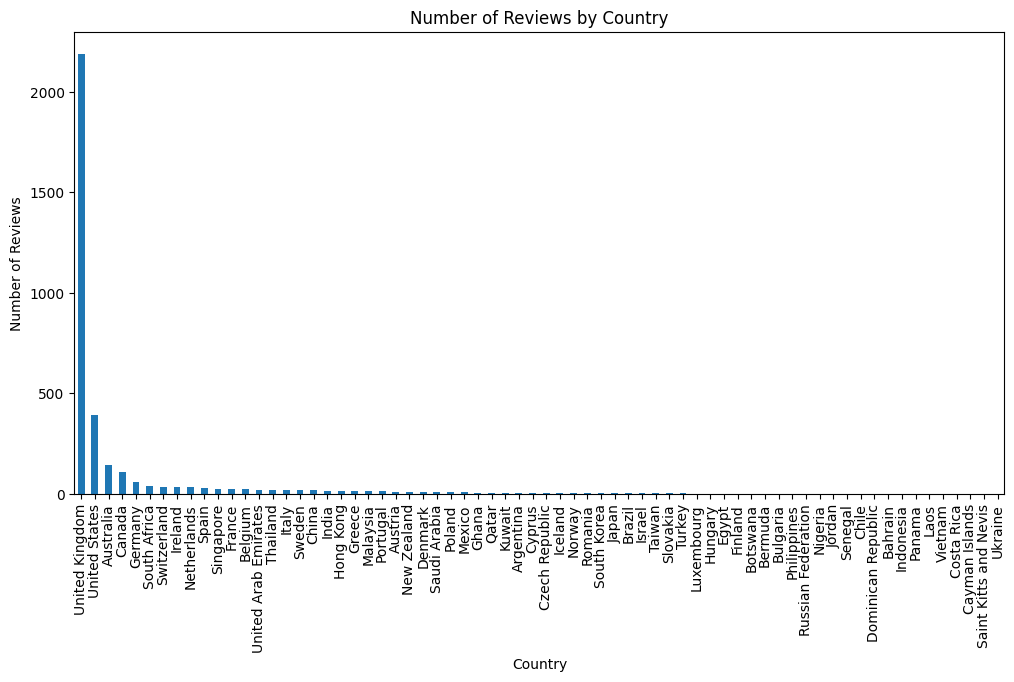

The country with the maximum number of reviews is 'United Kingdom' with 2189 reviews.


In [134]:

# Assuming your DataFrame is named 'df'
country_reviews_counts = df['Country'].value_counts()

# Get the country with the maximum reviews
max_reviews_country = country_reviews_counts.idxmax()
max_reviews_count = country_reviews_counts.max()

# Create a bar chart
plt.figure(figsize=(12, 6))
country_reviews_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Country')
plt.xticks(rotation=90)
plt.show()

print(f"The country with the maximum number of reviews is '{max_reviews_country}' with {max_reviews_count} reviews.")


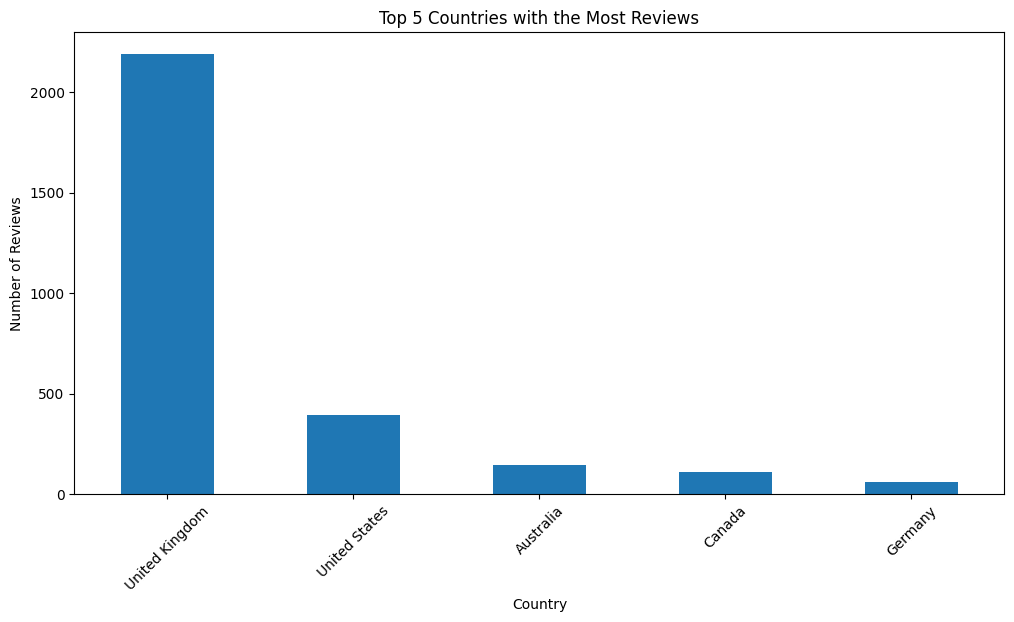

In [135]:
# Assuming your DataFrame is named 'df'
country_reviews_counts = df['Country'].value_counts()

# Get the top 5 countries with the highest number of reviews
top_countries = country_reviews_counts.head(5)

# Create a bar chart for the top 5 countries
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.title('Top 5 Countries with the Most Reviews')
plt.xticks(rotation=45)
plt.show()

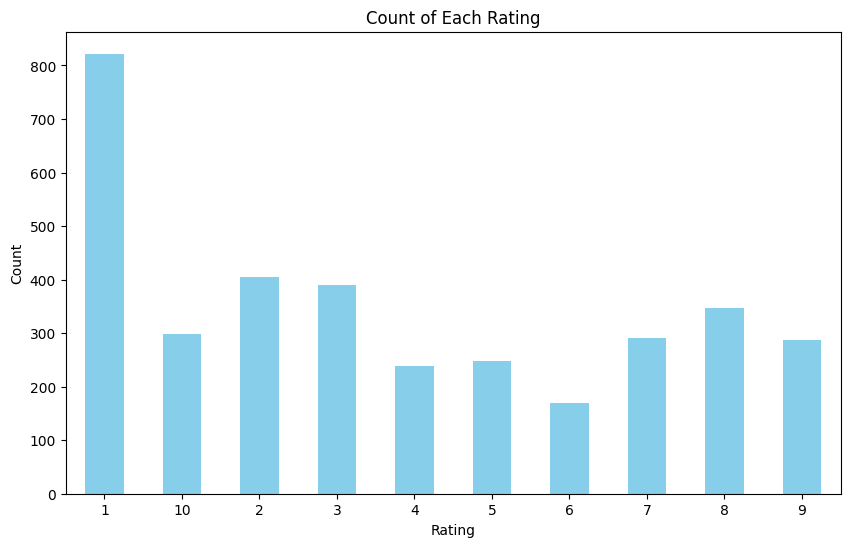

In [136]:
# Count the occurrences of each rating
rating_counts = df['Stars'].value_counts().sort_index()

# Create a bar chart for rating counts
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.xticks(rotation=0)
plt.show()

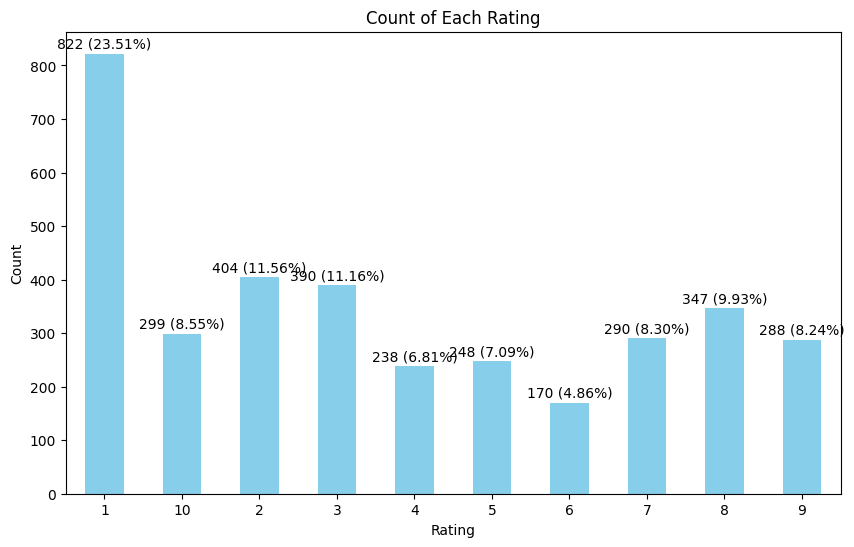

In [137]:
rating_counts = df['Stars'].value_counts().sort_index()

# Calculate the total number of reviews
total_reviews = len(df)

# Create a bar chart for rating counts with labels
plt.figure(figsize=(10, 6))
ax = rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.xticks(rotation=0)

# Add labels with the number of reviews for each rating above the bars
for i, count in enumerate(rating_counts):
    plt.text(i, count + 10, f'{count} ({count/total_reviews:.2%})', ha='center')

plt.show()

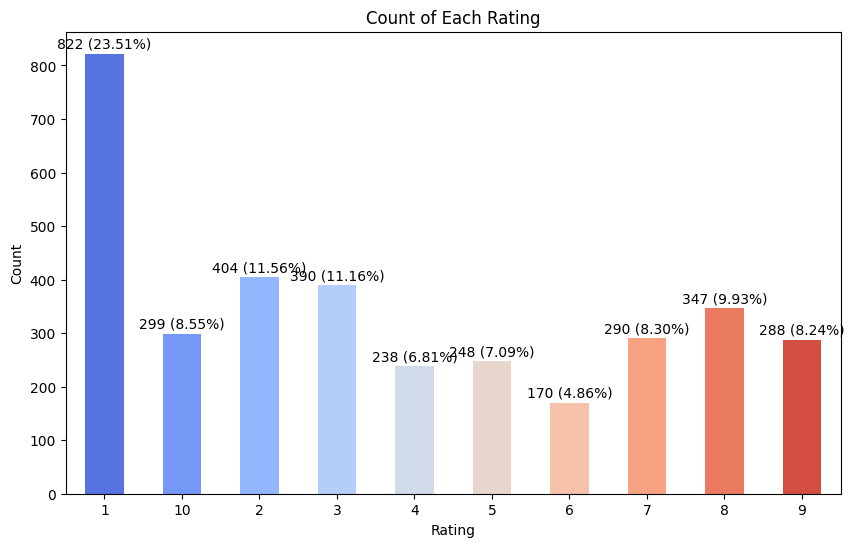

In [138]:
# Count the occurrences of each rating
rating_counts = df['Stars'].value_counts().sort_index()

# Calculate the total number of reviews
total_reviews = len(df)

# Define a custom color palette for the ratings
colors = sns.color_palette("coolwarm", len(rating_counts))

# Create a bar chart for rating counts with labels and custom colors
plt.figure(figsize=(10, 6))
ax = rating_counts.plot(kind='bar', color=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.xticks(rotation=0)

# Add labels with the number of reviews for each rating above the bars
for i, count in enumerate(rating_counts):
    plt.text(i, count + 10, f'{count} ({count/total_reviews:.2%})', ha='center')

plt.show()


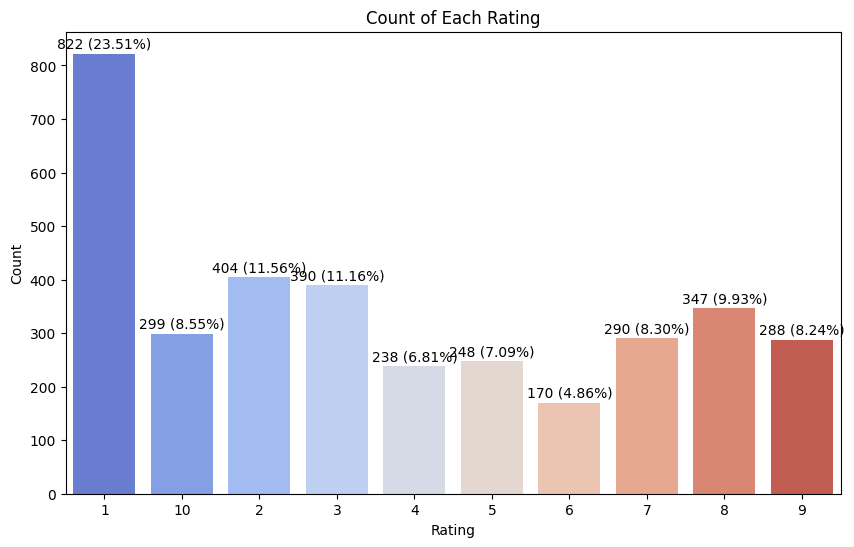

In [139]:
# Count the occurrences of each rating and sort by index (rating)
rating_counts = df['Stars'].value_counts().sort_index()

# Calculate the total number of reviews
total_reviews = len(df)

# Define a custom color palette for the ratings
colors = sns.color_palette("coolwarm", len(rating_counts))

# Create a bar chart for rating counts with labels and custom colors
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Each Rating')
plt.xticks(rotation=0)

# Add labels with the number of reviews for each rating above the bars
for x, count in enumerate(rating_counts.values):
    plt.text(x, count + 10, f'{count} ({count/total_reviews:.2%})', ha='center')

plt.show()